## 0. Import and some functions

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

## 1. Load data

Load all csv data in database

In [2]:
goats_df = pd.read_csv('/Users/yangbohan/Desktop/Gent University/Master_of_Science_in_Statistical_Data_Analysis/6Big Data Science/3 Project 5th June 2023 2359/Data/goats.csv')
# View the first 5 rows
goats_df.head()

,animal_ID,segment_ID,timestamp,a_vector_hurst,a_vector_series_length,a_vector_unitroot_pp,a_vector_unitroot_kpss,a_vector_hw_alpha,a_vector_hw_beta,a_vector_hw_gamma,...,g_vector_arch_lm,g_vector_x_acf1,g_vector_x_acf10,g_vector_diff1_acf1,g_vector_diff1_acf10,g_vector_diff2_acf1,g_vector_diff2_acf10,pressure,temp,class
0,G1,100,642.001,0.521575,400,-28.938445,0.050414,NaN,NaN,NaN,...,0.998948,0.989121,6.280122,0.919305,1.661123,0.808073,1.523806,1008.7450,33.31125,walking
1,G1,100,644.001,0.567764,400,-37.580618,0.047019,NaN,NaN,NaN,...,0.984484,0.984651,5.308345,0.897672,1.627134,0.610443,0.639739,1008.7598,33.31720,walking
2,G1,101,648.001,0.534168,400,-35.544131,0.079115,NaN,NaN,NaN,...,0.984780,0.984139,5.261556,0.899458,1.735248,0.698002,1.069269,1008.7468,33.37425,walking
3,G1,102,652.001,0.513071,400,-35.836599,0.030903,NaN,NaN,NaN,...,0.998334,0.980494,4.717197,0.926260,1.865898,0.800432,1.393809,1008.8148,34.11770,walking
4,G1,102,654.001,0.486342,400,-33.188392,0.038271,NaN,NaN,NaN,...,0.974447,0.979816,5.263391,0.886591,1.381983,0.636014,0.847309,1008.8226,34.11785,walking


In [3]:
# Delete column only with NaN
goats_df = goats_df.dropna(axis = 1, how='all')
goats_df.head()

,animal_ID,segment_ID,timestamp,a_vector_hurst,a_vector_series_length,a_vector_unitroot_pp,a_vector_unitroot_kpss,a_vector_stability,a_vector_nperiods,a_vector_seasonal_period,...,g_vector_arch_lm,g_vector_x_acf1,g_vector_x_acf10,g_vector_diff1_acf1,g_vector_diff1_acf10,g_vector_diff2_acf1,g_vector_diff2_acf10,pressure,temp,class
0,G1,100,642.001,0.521575,400,-28.938445,0.050414,0.840889,0,1,...,0.998948,0.989121,6.280122,0.919305,1.661123,0.808073,1.523806,1008.7450,33.31125,walking
1,G1,100,644.001,0.567764,400,-37.580618,0.047019,0.765626,0,1,...,0.984484,0.984651,5.308345,0.897672,1.627134,0.610443,0.639739,1008.7598,33.31720,walking
2,G1,101,648.001,0.534168,400,-35.544131,0.079115,0.789741,0,1,...,0.984780,0.984139,5.261556,0.899458,1.735248,0.698002,1.069269,1008.7468,33.37425,walking
3,G1,102,652.001,0.513071,400,-35.836599,0.030903,0.769454,0,1,...,0.998334,0.980494,4.717197,0.926260,1.865898,0.800432,1.393809,1008.8148,34.11770,walking
4,G1,102,654.001,0.486342,400,-33.188392,0.038271,0.782253,0,1,...,0.974447,0.979816,5.263391,0.886591,1.381983,0.636014,0.847309,1008.8226,34.11785,walking


In [4]:
# Check duplicated values
is_duplicate = goats_df.duplicated()
if is_duplicate.any():
    print("Duplicate data")
else:
    print("No duplicate data")

No duplicate data


In [5]:
# Count the number of attributes with missing values
attributes_with_missing = np.sum(np.any(pd.isna(goats_df), axis=0))
print("Attributes with missing values:", attributes_with_missing)

Attributes with missing values: 24


In [6]:
# Calculate the percentage of missing values
missing_rate = np.count_nonzero(pd.isna(goats_df))/np.prod(goats_df.shape)
print("Percentage of missing values:", missing_rate*100)

Percentage of missing values: 5.425599987040442


In [7]:
rows_with_missing_values = goats_df[goats_df.isnull().any(axis=1)]

print("rows with missing values：")
print(rows_with_missing_values)

rows with missing values：
      animal_ID  segment_ID  timestamp  a_vector_hurst  \
1173         G1         428   3520.001        0.692783   
5201         G2         273   2660.001        0.907502   
5624         G2         297   3550.001             NaN   
5683         G2         297   3668.001        0.879113   
6962         G2         420   6414.001        0.565833   
...         ...         ...        ...             ...   
16818        G4         454   7366.001        0.775028   
16944        G4         454   7618.001        0.552996   
16952        G4         454   7634.001        0.496671   
17128        G4         454   7986.001        0.378863   
17220        G4         455   8172.001        0.710569   

       a_vector_series_length  a_vector_unitroot_pp  a_vector_unitroot_kpss  \
1173                      400            -70.366273                0.353487   
5201                      400            -18.415028                1.429891   
5624                      400           

In [8]:
# load data set and label

r_train, labels = pd.factorize(goats_df['class'])
for i, label in enumerate(labels):
    print(f"There is {sum(r_train == i)} {label} class in dataset")

goats_df['animal_ID'], id_labels = pd.factorize(goats_df['animal_ID'])
for i, label in enumerate(id_labels):
    print(f"There is {sum(goats_df['animal_ID'] == i)} {label} goat in dataset")
data = goats_df
goats_df = goats_df.drop(['class',],axis = 1)

There is 2685 walking class in dataset
There is 182 trotting class in dataset
There is 11968 stationary class in dataset
There is 4010 grazing class in dataset
There is 149 running class in dataset
There is 4389 G1 goat in dataset
There is 4473 G2 goat in dataset
There is 4871 G3 goat in dataset
There is 5261 G4 goat in dataset


In [9]:
# Check data for further investigation
goats_array = goats_df.to_numpy(dtype=np.float32)
assert not np.isnan(goats_array).any(), f"Please resolve NaN value from the array"

AssertionError: Please resolve NaN value from the array

In [10]:
# Split the dataset into train, validation and test sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
X = goats_df
y = data['class']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_ratio, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_ratio/(validation_ratio + train_ratio), stratify=y_train_val)
print("X_train_val set shape:", X_train_val.shape)
print("y_train_val set shape:", y_train_val.shape)
print("X_train set shape:", X_train.shape)
print("y_train set shape:", y_train.shape)
print("X_val set shape:", X_val.shape)
print("y_val set shape:", y_val.shape)
print("X_test set shape:", X_test.shape)
print("y_test set shape:", y_test.shape)
X

X_train_val set shape: (17094, 103)
y_train_val set shape: (17094,)
X_train set shape: (14245, 103)
y_train set shape: (14245,)
X_val set shape: (2849, 103)
y_val set shape: (2849,)
X_test set shape: (1900, 103)
y_test set shape: (1900,)


,animal_ID,segment_ID,timestamp,a_vector_hurst,a_vector_series_length,a_vector_unitroot_pp,a_vector_unitroot_kpss,a_vector_stability,a_vector_nperiods,a_vector_seasonal_period,...,g_vector_crossing_points,g_vector_arch_lm,g_vector_x_acf1,g_vector_x_acf10,g_vector_diff1_acf1,g_vector_diff1_acf10,g_vector_diff2_acf1,g_vector_diff2_acf10,pressure,temp
0,0,100,642.001,0.521575,400,-28.938445,0.050414,0.840889,0,1,...,23,0.998948,0.989121,6.280122,0.919305,1.661123,0.808073,1.523806,1008.7450,33.311250
1,0,100,644.001,0.567764,400,-37.580618,0.047019,0.765626,0,1,...,18,0.984484,0.984651,5.308345,0.897672,1.627134,0.610443,0.639739,1008.7598,33.317200
2,0,101,648.001,0.534168,400,-35.544131,0.079115,0.789741,0,1,...,17,0.984780,0.984139,5.261556,0.899458,1.735248,0.698002,1.069269,1008.7468,33.374250
3,0,102,652.001,0.513071,400,-35.836599,0.030903,0.769454,0,1,...,21,0.998334,0.980494,4.717197,0.926260,1.865898,0.800432,1.393809,1008.8148,34.117700
4,0,102,654.001,0.486342,400,-33.188392,0.038271,0.782253,0,1,...,22,0.974447,0.979816,5.263391,0.886591,1.381983,0.636014,0.847309,1008.8226,34.117850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18989,3,98,674.001,0.546408,400,-28.985080,0.074632,0.823037,0,1,...,17,0.992992,0.983577,4.910303,0.917898,1.945894,0.805903,1.825046,1008.9232,45.379600
18990,3,98,676.001,0.574063,400,-24.546896,0.070628,0.849638,0,1,...,25,0.991389,0.982767,4.978059,0.900030,1.617334,0.753910,1.322444,1008.9010,45.375450
18991,3,99,680.001,0.658680,400,-30.016566,0.077178,0.792598,0,1,...,24,0.995453,0.981927,4.422025,0.927695,2.276061,0.804187,1.485858,1008.9480,45.304700
18992,3,9,62.001,0.563446,400,-40.322917,0.092269,0.793434,0,1,...,22,0.994158,0.983329,4.512319,0.917167,1.757347,0.718912,0.953544,1008.3290,41.097750


In [11]:
X_train_val = pd.DataFrame(X_train_val)
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)
print(X_train_val.isnull().sum().sum())      
print(X_train.isnull().sum().sum())                         
print(X_val.isnull().sum().sum()) 
print(X_test.isnull().sum().sum()) 
print(X_train_val.shape)      
print(X_train.shape)                        
print(X_val.shape) 
print(X_test.shape) 

96704
81477
15227
10472
(17094, 103)
(14245, 103)
(2849, 103)
(1900, 103)


In [12]:
# Simple imputation with the mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train_val_imp = imputer.fit_transform(X_train_val)
X_train_imp = imputer.fit_transform(X_train)
X_val_imp = imputer.transform(X_val)
X_test_imp = imputer.transform(X_test)
X_imp = imputer.transform(X)

In [13]:
X_train_val_imp = pd.DataFrame(X_train_val_imp)
X_train_imp = pd.DataFrame(X_train_imp)
X_val_imp = pd.DataFrame(X_val_imp)
X_test_imp = pd.DataFrame(X_test_imp)
X_imp = pd.DataFrame(X_imp)
print(X_train_val_imp.isnull().sum().sum())       
print(X_train_imp.isnull().sum().sum())                         
print(X_val_imp.isnull().sum().sum()) 
print(X_test_imp.isnull().sum().sum()) 
print(X_imp.isnull().sum().sum()) 
print(X_train_val_imp.shape)   
print(X_train_imp.shape)                 
print(X_val_imp.shape)
print(X_test_imp.shape) 
print(X_imp.shape) 

0
0
0
0
0
(17094, 103)
(14245, 103)
(2849, 103)
(1900, 103)
(18994, 103)


In [78]:
# Build the baseline models using train and validation sets

#oducibility, even though we are not interested
# in the prediction resu Use the same random state for reprlts here.
random_state = 0

# Declare the K-fold constructor: 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create dictionary of classifiers
clfs = {'Logistic Regression': LogisticRegression(solver='sag', max_iter=100000, random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state)}

for name, clf in clfs.items():
    print(name)
    acc = []
    # Perform 5-fold CV on train and validation datasets
    for i, (train_index, val_index) in enumerate(kf.split(X_train_imp, y_train)):
        # Per split, construct the training and test data
        X_train_0 = X_train_val_imp.values[train_index]
        X_val_0= X_train_val_imp.values[val_index]
        y_train_0 = y_train_val.values[train_index]
        y_val_0 = y_train_val.values[val_index]
        
        clf.fit(X_train_0, y_train_0)
        y_pred = clf.predict(X_val_0)
        acc.append(accuracy_score(y_val_0, y_pred))
        report=pd.DataFrame(classification_report(y_val_0,y_pred,output_dict=True, zero_division=1)).T
        
    print('mean validation accuracy score', np.mean(acc).round(4))
    print(report.round(4))
    print('---------------------------------------------')


Logistic Regression
mean validation accuracy score 0.9602
              precision  recall  f1-score    support
grazing          0.9453  0.9491    0.9472   746.0000
running          0.8182  0.8571    0.8372    21.0000
stationary       0.9874  0.9860    0.9867  2139.0000
trotting         0.9259  0.7353    0.8197    34.0000
walking          0.9008  0.9121    0.9064   478.0000
accuracy         0.9643  0.9643    0.9643     0.9643
macro avg        0.9155  0.8879    0.8994  3418.0000
weighted avg     0.9644  0.9643    0.9642  3418.0000
---------------------------------------------
Decision Tree
mean validation accuracy score 0.9902
              precision  recall  f1-score    support
grazing          0.9906  0.9866    0.9886   746.0000
running          0.9500  0.9048    0.9268    21.0000
stationary       0.9958  0.9981    0.9970  2139.0000
trotting         0.9118  0.9118    0.9118    34.0000
walking          0.9811  0.9791    0.9801   478.0000
accuracy         0.9915  0.9915    0.9915     0.9

In [14]:
# Dimensionality reduction

random_state = 0

# Declare the K-fold constructor: 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Build the models using train and validation sets
# Create dictionary of classifiers
clfs = {'Logistic Regression': LogisticRegression(solver='sag', max_iter=100000, random_state=random_state),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=0.02, random_state=random_state),
        'Random Forest, n=10': RandomForestClassifier(n_estimators = 10, random_state=random_state),
        'Random Forest, n=100': RandomForestClassifier(n_estimators = 100, random_state=random_state),
        'Random Forest, n=1000': RandomForestClassifier(n_estimators = 1000, random_state=random_state)}

# Create dictionary of dimensionality reduction techniques
drts = {'PCA': PCA(n_components=0.90)}

for clf_name, clf in clfs.items():
    for drt_name, drt in drts.items():
        print('The classifier:', clf_name,'; Dimensionality reduction:', drt_name)
        acc = []
        report = None
        # Perform 5-fold CV on train and validation datasets
        for i, (train_index, val_index) in enumerate(kf.split(X_train_imp, y_train)):
            # Per split, construct the training and test data
            X_train_0 = X_train_val_imp.values[train_index]
            X_val_0= X_train_val_imp.values[val_index]
            y_train_0 = y_train_val.values[train_index]
            y_val_0 = y_train_val.values[val_index]

            # Oversampling
            # Create SMOTE object
            smote = SMOTE()

            # Perform SMOTE oversampling
            X_train_0, y_train_0 = smote.fit_resample(X_train_0, y_train_0)
            
            # Declare the pipeline constructor
            pipe = Pipeline([
            ('normalization', StandardScaler()),
            ('dimensionality_reduction', drt),
            ('classification', clf),
            ]) 

            # Fit and evaluate the pipeline
            pipe.fit(X_train_0, y_train_0)
            preds = pipe.predict(X_val_0)
            
            # Measure and store the accuracy per fold
            acc.append(accuracy_score(y_val_0, preds))
            report=pd.DataFrame(classification_report(y_val_0, preds,output_dict=True, zero_division=1)).T
            
        print('mean accuracy score', np.mean(acc).round(4))
        print(report.round(4))
        print('----------------------------------------------------------------------')


The classifier: Logistic Regression ; Dimensionality reduction: PCA
mean accuracy score 0.9612
              precision  recall  f1-score    support
grazing          0.9183  0.9608    0.9391   714.0000
running          0.8485  0.8750    0.8615    32.0000
stationary       0.9907  0.9738    0.9822  2178.0000
trotting         0.6739  0.8857    0.7654    35.0000
walking          0.9557  0.9390    0.9473   459.0000
accuracy         0.9646  0.9646    0.9646     0.9646
macro avg        0.8774  0.9269    0.8991  3418.0000
weighted avg     0.9663  0.9646    0.9651  3418.0000
----------------------------------------------------------------------
The classifier: Decision Tree ; Dimensionality reduction: PCA
mean accuracy score 0.8807
              precision  recall  f1-score   support
grazing          0.7129  0.8207    0.7630   714.000
running          0.3288  0.7500    0.4571    32.000
stationary       0.9623  0.8903    0.9249  2178.000
trotting         0.4754  0.8286    0.6042    35.000
walking 

In [45]:
# Dimensionality reduction

random_state = 0

# Declare the K-fold constructor: 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Build the models using train and validation sets
# Create dictionary of classifiers
clfs = {'Logistic Regression': LogisticRegression(solver='sag', max_iter=100000, random_state=random_state),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=0.02, random_state=random_state),
        'Random Forest, n=10': RandomForestClassifier(n_estimators = 10, random_state=random_state),
        'Random Forest, n=100': RandomForestClassifier(n_estimators = 100, random_state=random_state),
        'Random Forest, n=1000': RandomForestClassifier(n_estimators = 1000, random_state=random_state)}

# Create dictionary of dimensionality reduction techniques
drts = {'LDA': LinearDiscriminantAnalysis(n_components=4)}

for clf_name, clf in clfs.items():
    for drt_name, drt in drts.items():
        print('The classifier:', clf_name,'; Dimensionality reduction:', drt_name)
        acc = []
        report = None
        # Perform 5-fold CV on train and validation datasets
        for i, (train_index, val_index) in enumerate(kf.split(X_train_imp, y_train)):
            # Per split, construct the training and test data
            X_train_0 = X_train_val_imp.values[train_index]
            X_val_0= X_train_val_imp.values[val_index]
            y_train_0 = y_train_val.values[train_index]
            y_val_0 = y_train_val.values[val_index]
            
            # Oversampling
            # Create SMOTE object
            smote = SMOTE()

            # Perform SMOTE oversampling
            X_train_0, y_train_0 = smote.fit_resample(X_train_0, y_train_0)
            
            # Declare the pipeline constructor
            pipe = Pipeline([
            ('normalization', StandardScaler()),
            ('dimensionality_reduction', drt),
            ('classification', clf),
            ]) 

            # Fit and evaluate the pipeline
            pipe.fit(X_train_0, y_train_0)
            preds = pipe.predict(X_val_0)
            
            # Measure and store the accuracy per fold
            acc.append(accuracy_score(y_val_0, preds))
            report=pd.DataFrame(classification_report(y_val_0, preds,output_dict=True, zero_division=1)).T
            
        print('mean accuracy score', np.mean(acc).round(4))
        print(report.round(4))
        print('----------------------------------------------------------------------')


The classifier: Logistic Regression ; Dimensionality reduction: LDA
mean accuracy score 0.9609
              precision  recall  f1-score    support
grazing          0.8978  0.9474    0.9220   742.0000
running          0.9167  0.9429    0.9296    35.0000
stationary       0.9908  0.9629    0.9767  2130.0000
trotting         0.7895  0.9091    0.8451    33.0000
walking          0.9369  0.9623    0.9494   478.0000
accuracy         0.9587  0.9587    0.9587     0.9587
macro avg        0.9063  0.9449    0.9245  3418.0000
weighted avg     0.9604  0.9587    0.9592  3418.0000
----------------------------------------------------------------------
The classifier: Decision Tree ; Dimensionality reduction: LDA
mean accuracy score 0.9454
              precision  recall  f1-score    support
grazing          0.8833  0.8976    0.8904   742.0000
running          0.9167  0.9429    0.9296    35.0000
stationary       0.9812  0.9540    0.9674  2130.0000
trotting         0.7250  0.8788    0.7945    33.0000
wal

In [75]:
# Dimensionality reduction

random_state = 0

# Declare the K-fold constructor: 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Build the models using train and validation sets
# Create dictionary of classifiers
clfs = {'Logistic Regression': LogisticRegression(solver='sag', max_iter=100000, random_state=random_state),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=0.02, random_state=random_state),
        'Random Forest, n=10': RandomForestClassifier(n_estimators = 10, random_state=random_state),
        'Random Forest, n=100': RandomForestClassifier(n_estimators = 100, random_state=random_state),
        'Random Forest, n=1000': RandomForestClassifier(n_estimators = 1000, random_state=random_state)}

# Create dictionary of dimensionality reduction techniques
drts = {'SVD': TruncatedSVD(n_components=4)}

for clf_name, clf in clfs.items():
    for drt_name, drt in drts.items():
        print('The classifier:', clf_name,'; Dimensionality reduction:', drt_name)
        acc = []
        report = None
        # Perform 5-fold CV on train and validation datasets
        for i, (train_index, val_index) in enumerate(kf.split(X_train_imp, y_train)):
            # Per split, construct the training and test data
            X_train_0 = X_train_val_imp.values[train_index]
            X_val_0= X_train_val_imp.values[val_index]
            y_train_0 = y_train_val.values[train_index]
            y_val_0 = y_train_val.values[val_index]
            
            # Oversampling
            # Create SMOTE object
            smote = SMOTE()

            # Perform SMOTE oversampling
            X_train_0, y_train_0 = smote.fit_resample(X_train_0, y_train_0)
            
            # Declare the pipeline constructor
            pipe = Pipeline([
            ('normalization', StandardScaler()),
            ('dimensionality_reduction', drt),
            ('classification', clf),
            ]) 

            # Fit and evaluate the pipeline
            pipe.fit(X_train_0, y_train_0)
            preds = pipe.predict(X_val_0)
            
            # Measure and store the accuracy per fold
            acc.append(accuracy_score(y_val_0, preds))
            report=pd.DataFrame(classification_report(y_val_0, preds,output_dict=True, zero_division=1)).T
            
        print('mean accuracy score', np.mean(acc).round(4))
        print(report.round(4))
        print('----------------------------------------------------------------------')


The classifier: Logistic Regression ; Dimensionality reduction: SVD
mean accuracy score 0.8886
              precision  recall  f1-score    support
grazing          0.7543  0.8231    0.7872   746.0000
running          0.6957  0.7619    0.7273    21.0000
stationary       0.9642  0.9191    0.9411  2139.0000
trotting         0.5625  0.7941    0.6585    34.0000
walking          0.8583  0.8870    0.8724   478.0000
accuracy         0.8915  0.8915    0.8915     0.8915
macro avg        0.7670  0.8370    0.7973  3418.0000
weighted avg     0.8979  0.8915    0.8938  3418.0000
----------------------------------------------------------------------
The classifier: Decision Tree ; Dimensionality reduction: SVD
mean accuracy score 0.8608
              precision  recall  f1-score    support
grazing          0.6917  0.8271    0.7534   746.0000
running          0.5517  0.7619    0.6400    21.0000
stationary       0.9536  0.8841    0.9175  2139.0000
trotting         0.5319  0.7353    0.6173    34.0000
wal

In [32]:
# Measuring runtimes

random_state = 0

# Create empty lists to store the results
classifier_list = []
p_list = []
construction_time_list = []
query_time_list = []

# Create dictionary of classifiers
clfs = {'Logistic Regression': LogisticRegression(solver='sag', max_iter=100000, random_state=random_state),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=0.02, random_state=random_state),
        'Random Forest, n=10': RandomForestClassifier(n_estimators = 10, random_state=random_state),
        'Random Forest, n=100': RandomForestClassifier(n_estimators = 100, random_state=random_state),
        'Random Forest, n=1000': RandomForestClassifier(n_estimators = 1000, random_state=random_state)}

# Select 1000 test instances
# Note that they are stratified, so the classes are balanced
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(
    X_train_val_imp, y_train_val, test_size=1000, stratify=y_train_val, random_state=random_state
)

In [33]:
from datetime import datetime

# Iterate over the powers of 2 that we will use
for p in range(3, 14):
    print('Current loop: 2^{}'.format(p))
    
    # Stratify by 'y_train_1' to ensure our training set contains instances from both classes.
    X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(
        X_train_1, y_train_1, train_size=2**p, stratify=y_train_1, random_state=random_state
    )

    for clf_name, clf in clfs.items():
        # Measure construction time
        fit_start_time = datetime.now()
        model = clf.fit(X_train_2, y_train_2)
        construction_time = (datetime.now() - fit_start_time).total_seconds()
        
        # Measure query time
        predict_start_time = datetime.now()
        model.predict(X_val_1)
        query_time = (datetime.now() - predict_start_time).total_seconds()
        
        # Store results
        classifier_list.append(clf_name)
        p_list.append(p)
        construction_time_list.append(construction_time)
        query_time_list.append(query_time/1000)

        
# Create a dictionary to store the results
results_dict = {'classifier': classifier_list,
                'p': p_list,
                'construction_time': construction_time_list,
                'query_time': query_time_list}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)

Current loop: 2^3
Current loop: 2^4
Current loop: 2^5
Current loop: 2^6
Current loop: 2^7
Current loop: 2^8
Current loop: 2^9
Current loop: 2^10
Current loop: 2^11
Current loop: 2^12
Current loop: 2^13


In [34]:
results_df.head(33)

,classifier,p,construction_time,query_time
0,Logistic Regression,3,0.051415,3.397000e-06
1,Decision Tree,3,0.002026,1.290000e-06
2,"Random Forest, n=10",3,0.008833,2.507000e-06
3,"Random Forest, n=100",3,0.076802,1.197300e-05
4,"Random Forest, n=1000",3,0.765355,8.659300e-05
5,Logistic Regression,4,0.079606,1.314000e-06
6,Decision Tree,4,0.001289,8.470000e-07
7,"Random Forest, n=10",4,0.009553,2.883000e-06
8,"Random Forest, n=100",4,0.079522,1.374900e-05
9,"Random Forest, n=1000",4,0.690532,6.823600e-05


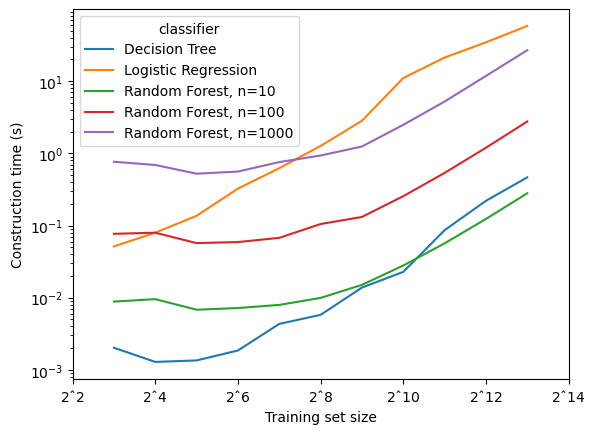

In [48]:
# Pivoting and plotting runtimes
# Pivot to obtain columns that correspond to the different classifiers
construction_time = results_df.pivot(index='p', columns='classifier', values='construction_time')

# Plot construction times
construction_time.plot()

# Set y-axis to logarithmic scale
axes = plt.gca()
axes.set_yscale('log', base=10)

# Format ticks and labels
xticks = axes.get_xticks()
labels = [int(xticks) for xticks in xticks]
axes.set_xticks(xticks)
axes.set_xticklabels(['$\mathregular{{2ˆ{{{}}}}}$'.format(labels) for labels in labels])

# Set axis labels and save the plot
axes.set_xlabel('Training set size')
axes.set_ylabel('Construction time (s)')
plt.show()

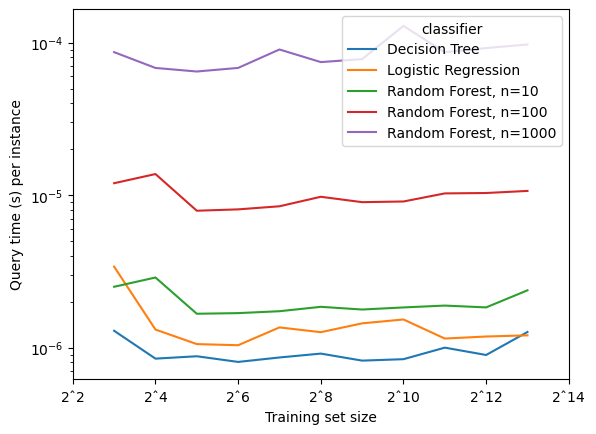

In [49]:
# Pivot to obtain columns that correspond to the different classifiers
query_times = results_df.pivot(index='p', columns='classifier', values='query_time')

# Plot query times
query_times.plot()

# Set y-axis to logarithmic scale
axes = plt.gca()
axes.set_yscale('log', base=10)

# Format ticks and labels
xticks = axes.get_xticks()
labels = [int(xticks) for xticks in xticks]
axes.set_xticks(xticks)
axes.set_xticklabels(['$\mathregular{{2ˆ{{{}}}}}$'.format(labels) for labels in labels])

# Set axis labels and save the plot
axes.set_xlabel('Training set size')
axes.set_ylabel('Query time (s) per instance')
plt.show()

In [52]:
# The optimal dimensionality reduction method is LDA and the optimal classifier is Random Forest.
# Fit the dimensionality reducer and classifier on training and testing set. 
random_state = 0

clfs = {
    'Random Forest, n=1000': RandomForestClassifier(n_estimators = 1000, random_state=random_state)}
# Create dictionary of dimensionality reduction techniques
drts = {'LDA': LinearDiscriminantAnalysis(n_components=4)}

for clf_name, clf in clfs.items():
    for drt_name, drt in drts.items():
        print('The classifier:', clf_name,'; Dimensionality reduction:', drt_name)
        acc = []
        report = None
            
        # Oversampling
        # Create SMOTE object
        smote = SMOTE()

        # Perform SMOTE oversampling
        X_train_imp, y_train = smote.fit_resample(X_train_imp, y_train)

        # Declare the pipeline constructor
        pipe = Pipeline([
        ('normalization', StandardScaler()),
        ('dimensionality_reduction', drt),
        ('classification', clf),
        ]) 

        # Fit and evaluate the pipeline
        pipe.fit( X_train_imp, y_train)
        preds = pipe.predict(X_test_imp)

        # Measure and store the accuracy per fold
        acc.append(accuracy_score(y_test, preds))
        report=pd.DataFrame(classification_report(y_test, preds,output_dict=True, zero_division=1)).T

    print('mean accuracy score', np.mean(acc).round(4))
    print(report.round(4))
    print('----------------------------------------------------------------------')

The classifier: Random Forest, n=1000 ; Dimensionality reduction: LDA
mean accuracy score 0.9637
              precision  recall  f1-score    support
grazing          0.9223  0.9476    0.9348   401.0000
running          1.0000  1.0000    1.0000    15.0000
stationary       0.9856  0.9699    0.9777  1197.0000
trotting         0.8824  0.8333    0.8571    18.0000
walking          0.9353  0.9665    0.9506   269.0000
accuracy         0.9637  0.9637    0.9637     0.9637
macro avg        0.9451  0.9435    0.9441  1900.0000
weighted avg     0.9642  0.9637    0.9638  1900.0000
----------------------------------------------------------------------


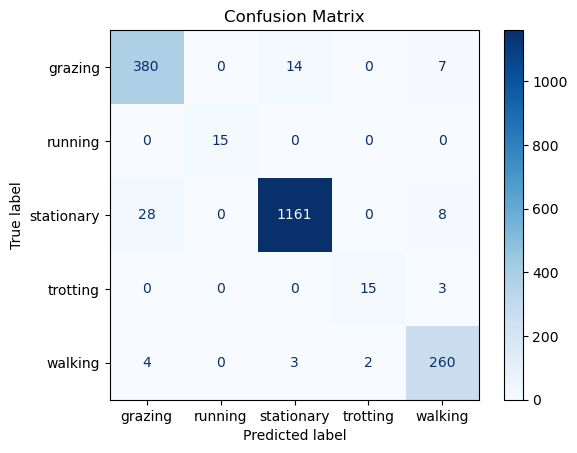

In [53]:
#Multi-class confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
